You are given a dataset with numeric features HEIGHT, WIDTH and DEPTH of postal packages and a numeric target variable PRICE (in USD) that a postal company earned for sending these packages to the respective destination. 


- Compute a **linear regression model** for predicting the price given the height, width and depth of the package and **report on the performance of the model.** 

- Please explain your results in detail and do not just print the R^2 score of a linear regression library (you will be asked to interpret the results, i.e. **if you receive an MAE of X USD**, is that a good model or not? **Should you recommend to put it in production?**). Please do not spend more than 60 minutes on this task.
 
 

In [1]:
import os
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
#from sklearn.feature_selection import 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.decomposition import PCA
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
import seaborn as sb

In [2]:
os.chdir('data/task_3_postal_packages')

In [3]:
!ls

postal_package_data.csv


In [4]:
df = pd.read_csv('postal_package_data.csv')
df["HEIGHT"] = df["HEIGHT"] +1  # To avoid zero volume as I transform the skewed volume with "ln"
df["DEPTH"] = df["DEPTH"] +1  # To avoid zero volume as I transform the skewed volume with "ln"
# For getting a feeling of the trends in the data using visualization:
bin_labels_3 = ['low', 'mid', 'high']
df['quantile_WIDTH'] = pd.qcut(df['WIDTH'], q=3, labels=bin_labels_3)
df['quantile_HEIGHT'] = pd.qcut(df['HEIGHT'], q=3, labels=bin_labels_3)
df['quantile_DEPTH'] = pd.qcut(df['DEPTH'], q=3, labels=bin_labels_3)
df['quantile_PRICE'] = pd.qcut(df['PRICE'], q=3, labels=bin_labels_3)

df['weight2'] = df['WIDTH']**2
df['height2'] = df['HEIGHT']**2
df['depth2'] = df['DEPTH']**2

df['weight3'] = df['WIDTH']**3
df['height3'] = df['HEIGHT']**3
df['depth3'] = df['DEPTH']**3


df['vol'] = np.log(df["WIDTH"] * df["HEIGHT"] * df["DEPTH"])
df['quantile_vol'] = pd.qcut(df['vol'], q=3, labels=bin_labels_3)

#######




y = df['PRICE'].values

X_df = df.drop(['PRICE'], axis = 1)

X = X_df.values


In [5]:
X_train_df, X_test_df, y_train, y_test = train_test_split(X_df, y, test_size=0.33, random_state=42)

# Also for visualization, to get a feeling of the possible trends 
X_train_pca = X_train_df[["WIDTH", "HEIGHT", "DEPTH"]].values
obj = PCA(n_components=1, random_state=0)
obj.fit(X_train_pca) 

X_train_df['pca_feature'] = obj.transform(X_train_pca)

X_test_pca = X_test_df[["WIDTH", "HEIGHT", "DEPTH"]].values
X_test_df['pca_feature'] = obj.transform(X_test_pca)


#*********************************************************
#*********************************************************

X_train = X_train_df[["WIDTH", "HEIGHT", "DEPTH"]].values
X_test = X_test_df[["WIDTH", "HEIGHT", "DEPTH"]].values


# Did not use these at the end: 
X_train_vol = X_train_df[["vol"]].values.reshape(-1, 1)
X_test_vol = X_test_df[["vol"]].values.reshape(-1, 1)

X_train_pca = X_train_df[["pca_feature"]].values.reshape(-1, 1)
X_test_pca = X_test_df[["pca_feature"]].values.reshape(-1, 1)



X_train_poly = X_train_df[["WIDTH", "HEIGHT", "DEPTH", "weight2", "height2", "depth2"]].values
X_test_poly = X_test_df[["WIDTH", "HEIGHT", "DEPTH", "weight2", "height2", "depth2"]].values




/Users/skharabian/miniconda3/envs/Conreg36/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/skharabian/miniconda3/envs/Conreg36/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [6]:
df.describe(include='all')

,WIDTH,HEIGHT,DEPTH,PRICE,quantile_WIDTH,quantile_HEIGHT,quantile_DEPTH,quantile_PRICE,weight2,height2,depth2,weight3,height3,depth3,vol,quantile_vol
count,2000.000000,2000.000000,2000.000000,2000.000000,2000,2000,2000,2000,2000.000000,2000.00000,2000.000000,2.000000e+03,2.000000e+03,2.000000e+03,2000.000000,2000
unique,NaN,NaN,NaN,NaN,3,3,3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,low,low,low,low,NaN,NaN,NaN,NaN,NaN,NaN,NaN,high
freq,NaN,NaN,NaN,NaN,671,675,674,695,NaN,NaN,NaN,NaN,NaN,NaN,NaN,667
mean,100.004500,101.475500,101.161500,52.373000,NaN,NaN,NaN,NaN,11516.496500,11887.22950,11741.276500,1.458815e+06,1.531306e+06,1.497514e+06,13.527256,NaN
std,38.940399,39.884179,38.837889,14.838664,NaN,NaN,NaN,NaN,8153.925767,8424.25465,8229.533124,1.512910e+06,1.579860e+06,1.537944e+06,0.913359,NaN
min,1.000000,1.000000,1.000000,15.000000,NaN,NaN,NaN,NaN,1.000000,1.00000,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,8.323608,NaN
25%,74.000000,73.000000,74.000000,42.000000,NaN,NaN,NaN,NaN,5476.000000,5329.00000,5476.000000,4.052240e+05,3.890170e+05,4.052240e+05,13.068646,NaN
50%,99.000000,103.000000,101.000000,52.000000,NaN,NaN,NaN,NaN,9801.000000,10609.00000,10201.000000,9.702990e+05,1.092727e+06,1.030301e+06,13.664071,NaN
75%,126.000000,128.000000,128.000000,62.000000,NaN,NaN,NaN,NaN,15876.000000,16384.00000,16384.000000,2.000376e+06,2.097152e+06,2.097152e+06,14.153148,NaN


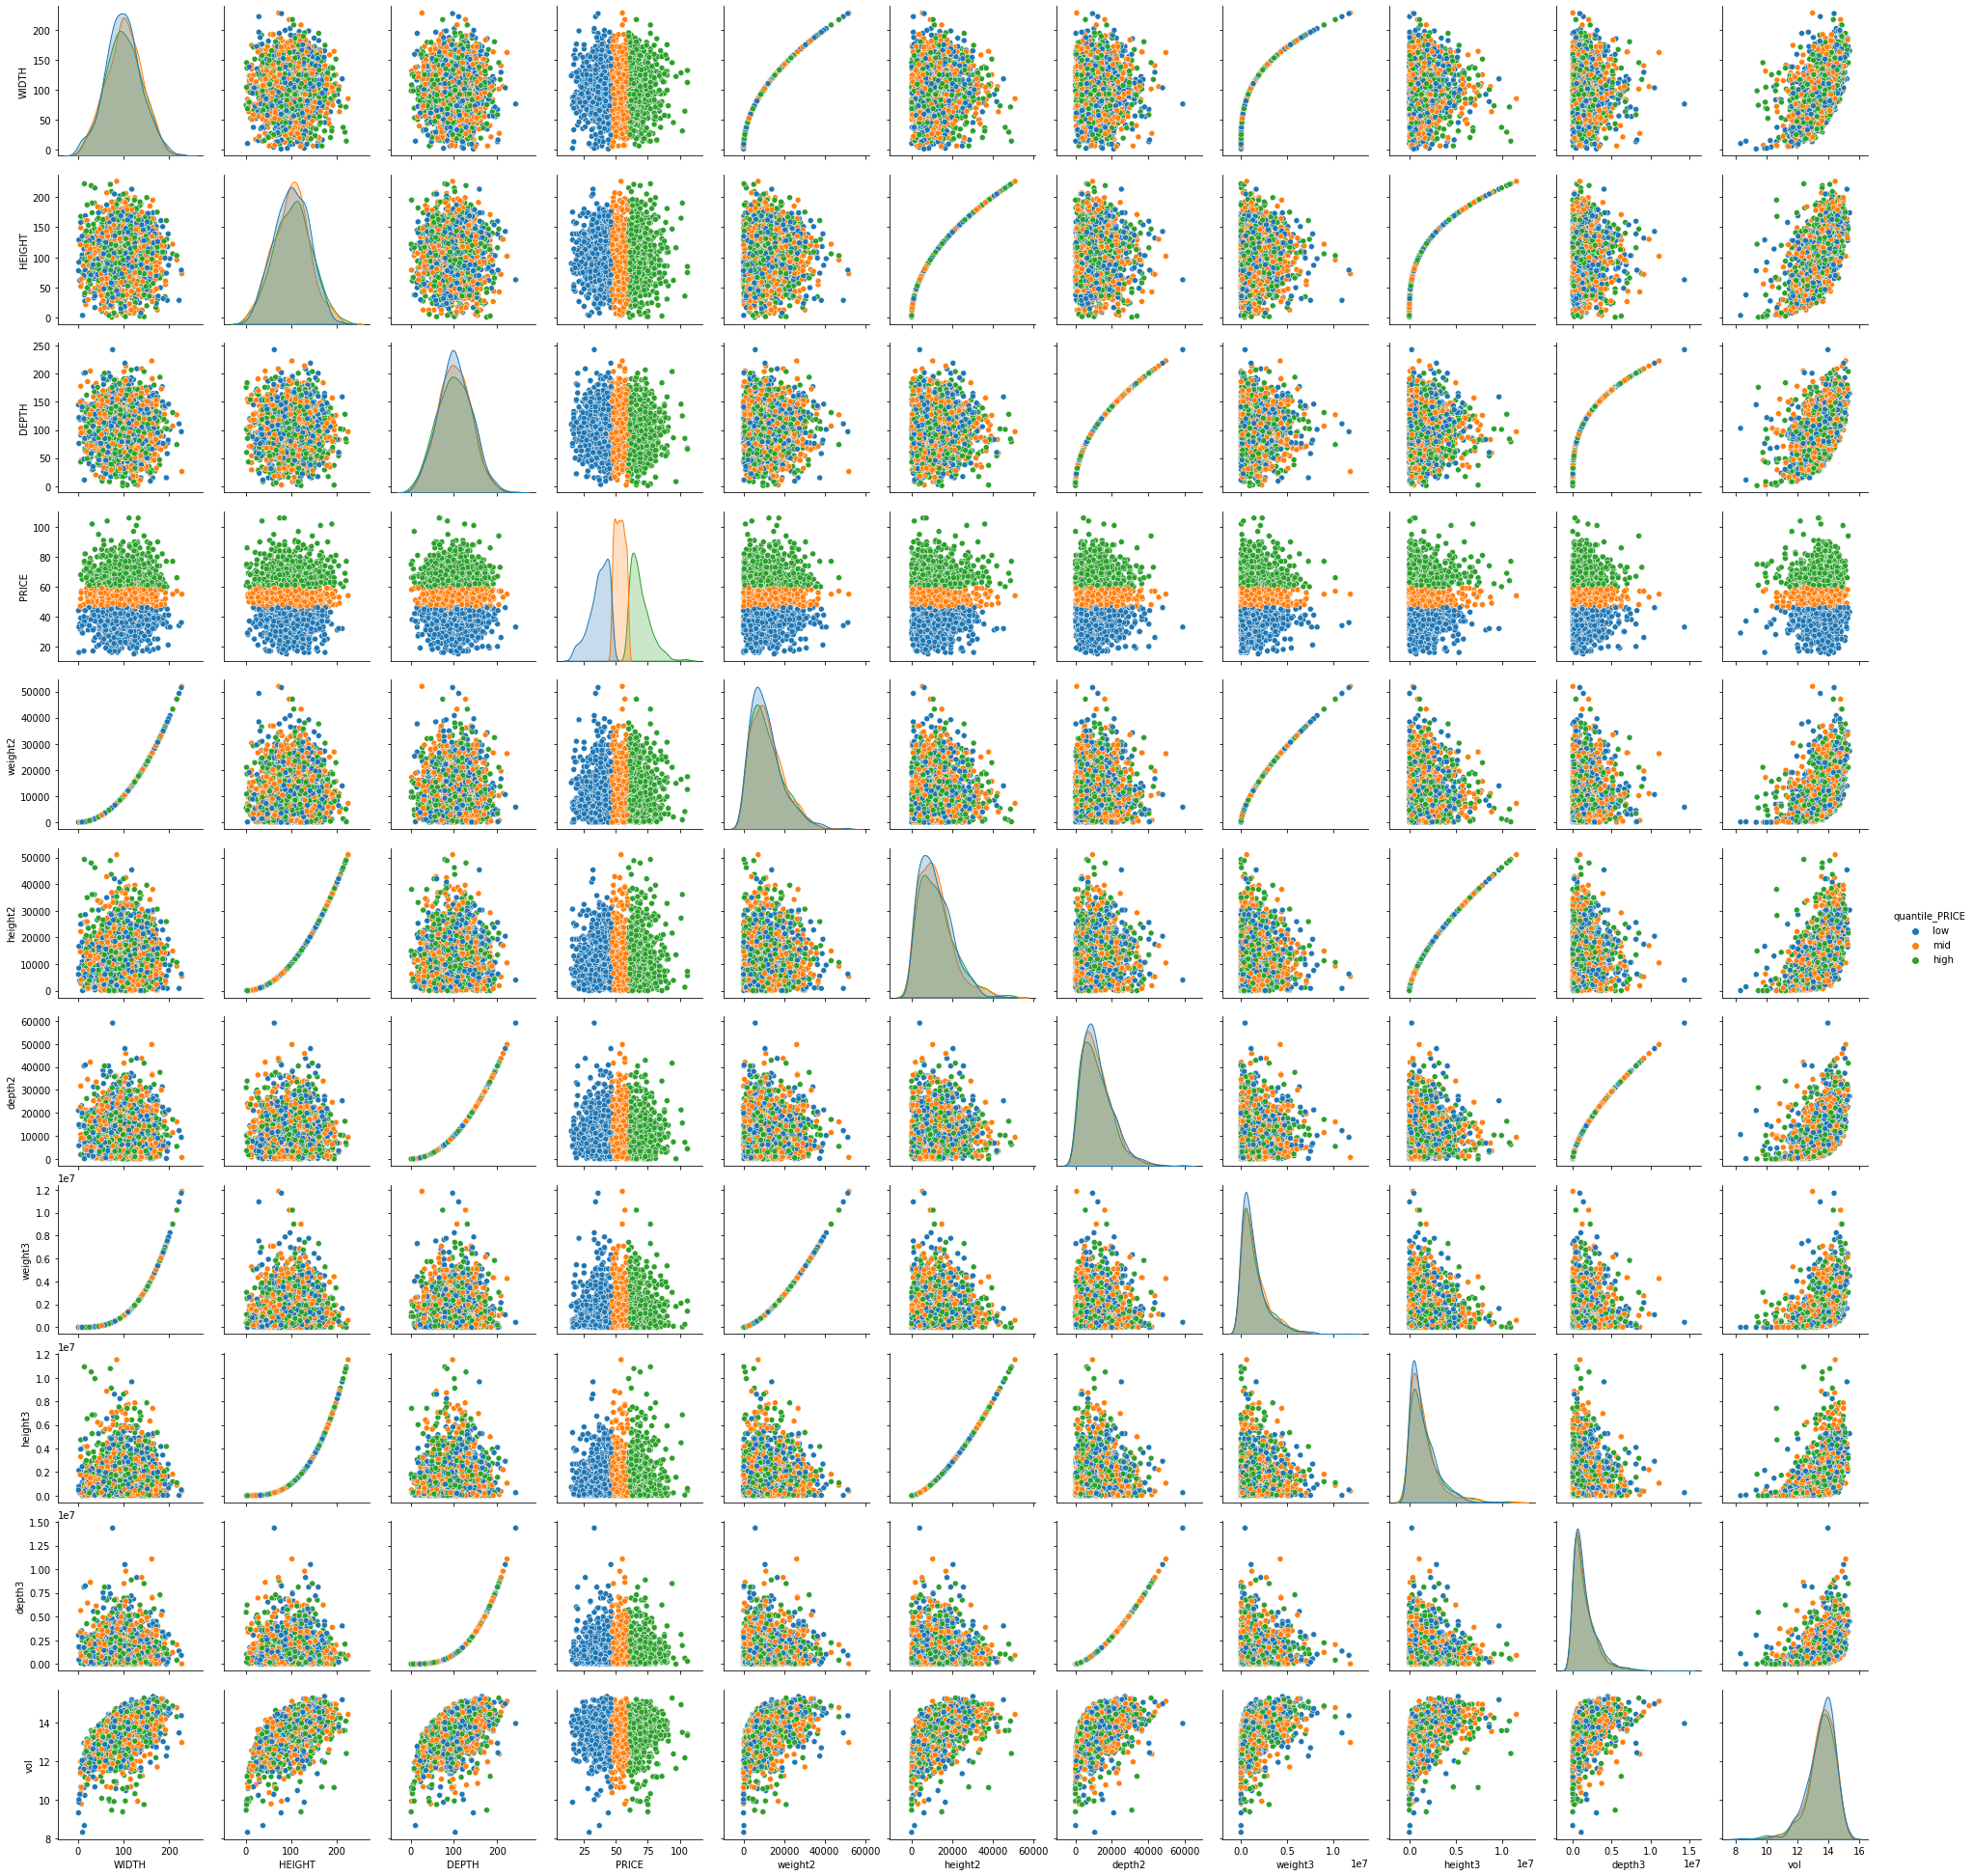

In [7]:
# Visualization:
sb.pairplot(df, hue = 'quantile_PRICE')

In [27]:
# Run Grid search for the best performing combination of preprocessings: 
kf = KFold(n_splits=3, random_state=0)

poly_obj = PolynomialFeatures()
pca = PCA(random_state=0)
std_obj = StandardScaler()
# set the tolerance to a large value to make the example faster
lr_obj = LinearRegression()
#pipe = Pipeline(steps=[('standard',std_obj), ('Polynomial', poly_obj), ('pca', pca), ('linear_reg', lr_obj)])
#pipe = Pipeline(steps=[('Polynomial', poly_obj), ('pca', pca), ('linear_reg', lr_obj)])
pipe = Pipeline(steps=[('standard',std_obj),('pca', 'passthrough'),('linear_reg', lr_obj)])



#param_grid = {'Polynomial__degree': [0, 1, 2, 3], 
#              'pca__n_components': [1, 2, 3]}

param_grid = {'pca': [pca], 'pca__n_components': [1, 2, 3]}



gs = GridSearchCV(pipe, param_grid, scoring='neg_mean_absolute_error',cv = kf, n_jobs=-1)
gs.fit(X_train, y_train)
print("Best parameter (CV score=%0.3f):" % gs.best_score_)
print(gs.best_params_)


# Now use best model:


y_pred = gs.predict(X_test)
Test_MAE = mean_absolute_error(y_test, y_pred)

print('MAE of the test : ', Test_MAE)

/Users/skharabian/miniconda3/envs/Conreg36/lib/python3.6/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Best parameter (CV score=-11.828):
{'pca': PCA(n_components=1, random_state=0), 'pca__n_components': 1}
MAE of the test :  12.087225238776362


In [32]:
gs.best_estimator_[2].coef_

array([-0.20377881])

In [33]:
gs.best_estimator_[1].components_

array([[-0.51412965,  0.43814501,  0.73735992]])

,y_test,y_test_pred
y_test,1.000000,-0.015408
y_test_pred,-0.015408,1.000000


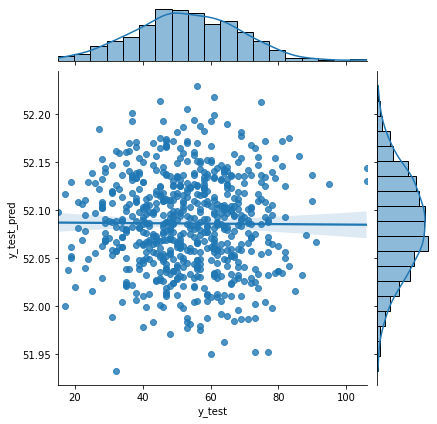

In [22]:
plot_df = pd.DataFrame(data=[], columns=['y_test', 'y_test_pred'])
#plot_df['x_test'] = X_test
plot_df['y_test'] = y_test#.reshape(-1, 1)
plot_df['y_test_pred'] = y_pred#.reshape(-1, 1)


sb.jointplot(data=plot_df, x = 'y_test', y ='y_test_pred', kind="reg")
plot_df.corr(method='spearman')